In [34]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
%cd /content/gdrive/My Drive/ENPM673/Project3

/content/gdrive/My Drive/ENPM673/Project3


# **Task 1.**


1. Image Collection:

a. Collect approximately 50 images of a calibration board using a camera of your choice.

b. Save these images to your Google Drive. Also, add the link to these images in a text cell of your .ipynb file.

[Note: You might use the similar calibration board, but every individual should take their own 50 Images]

----

2. Calibration Pipeline:

a. Choose either a chessboard or circular pattern for calibration.

b. Explain the process of corner detection or centroid detection for the chosen pattern.

c. You do not need to write any function from scratch, Utilize OpenCV functions for camera calibration.

d. Provide a step-by-step explanation of each stage of the calibration pipeline and write code for it, including the initialization of calibration parameters, image undistortion, and optimization of camera intrinsic and extrinsic parameters.

[Note: Make sure you display the image and the undistorted image results.]

----

3. Reprojection Error Analysis:

a. Plot a graph showing the reprojection error for each image used in the calibration process.

b. The x-axis should represent the image number, and the y-axis should represent the reprojection error.

c. Discuss the significance of the reprojection error and its implications for the accuracy of the calibration.

----

4. Visualization of Calibration Results:

a. After calibration, redraw the detected corners or centroids on the original images.

b. Show the detected corners/centroids before and after calibration.

c. Differentiate between the original corner/centroid detection and the reprojection of these points based on the calculated camera parameters (R, T, and K).

d. Use different colors to represent the original and reprojected points for clarity.

1. Image Collection:

Image drive link: https://drive.google.com/drive/folders/194hs49UdUlIuKUsUzio2JRcmzz97ho__?usp=share_link


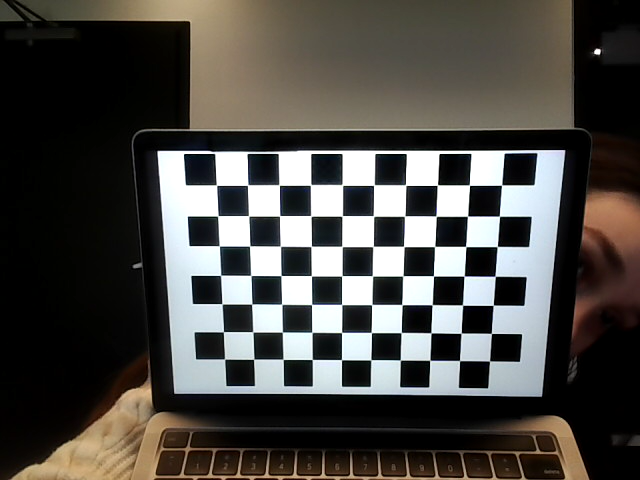

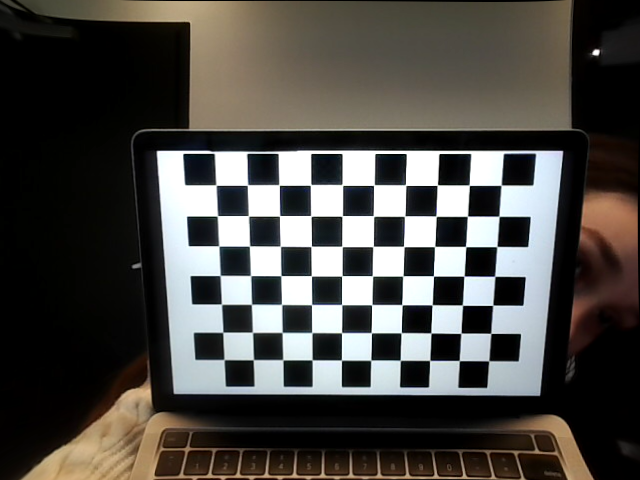

In [ ]:
# Path to the folder containing calibration images
images_path = 'images/*.png'
images = glob.glob(images_path)

# ---- Choose either a chessboard or circular pattern for calibration. -----
# chessboard chosen

# -----  the initialization of calibration parameters -----
# Chessboard parameters
nx = 10
ny = 7

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ..., (nx-1,ny-1,0)
objp = np.zeros((nx * ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

objpoints = []
imgpoints = []

# ---- Process of Corner Detection -----
###
# Iterate through each image.
# Convert the image to grayscale.
# Use cv2.findChessboardCorners() to detect the corners of the chessboard pattern in the grayscale image.
# If corners are found, store the corresponding 3D object points (objp) and 2D image points (corners).
###

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
       # cv2_imshow( img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

# ---- d. Provide a step-by-step explanation of each stage of the calibration pipeline and write code for it ----
 #including the initialization of calibration parameters, image undistortion, and optimization of camera intrinsic and extrinsic parameters.

# Calibrate the camera
img_size = (img.shape[1], img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# Save calibration parameters to a file (optional)
calibration_data = {'camera_matrix': mtx, 'dist_coeff': dist}
np.save('calibration_data.npy', calibration_data)

#--- undistorion ---

example_img = cv2.imread('images/img18.png')
h,w =example_img.shape[:2]
# newCamMat, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))


undistorted_img = cv2.undistort(example_img, mtx, dist, None, mtx)
#crop the image
# x,y,w,h = roi
# undistorted_img = undistorted_img[y:y+h, x:x+w]
# Display original and undistorted images
cv2_imshow(example_img)
cv2_imshow(undistorted_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


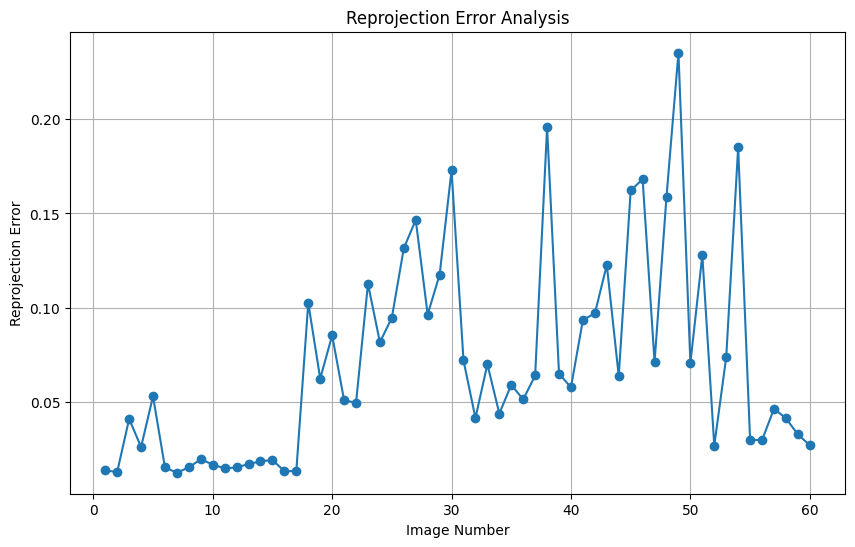

Average Reprojection Error: 0.07049256787643063


In [ ]:
# Reprojection Error Analysis:
# a. Plot a graph showing the reprojection error for each image used in the calibration process.
# b. The x-axis should represent the image number, and the y-axis should represent the reprojection error.
# c. Discuss the significance of the reprojection error and its implications for the accuracy of the calibration.

reprojection_errors = []

for i in range(len(objpoints)):
    imgpoints_reprojected, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints_reprojected, cv2.NORM_L2) / len(imgpoints_reprojected)
    reprojection_errors.append(error)

# Plot reprojection errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(reprojection_errors) + 1), reprojection_errors, marker='o', linestyle='-')
plt.title('Reprojection Error Analysis')
plt.xlabel('Image Number')
plt.ylabel('Reprojection Error')
plt.grid(True)
plt.show()

# Print average reprojection error
average_error = np.mean(reprojection_errors)
print(f"Average Reprojection Error: {average_error}")



Reprojection error measures how accurately a calibrated camera's model matches real-world points to image points. Low error means accurate calibration and less distorted images, while high error suggests calibration issues affecting image quality and computer vision tasks. Minimizing reprojection error is key for reliable calibration and better computer vision performance.

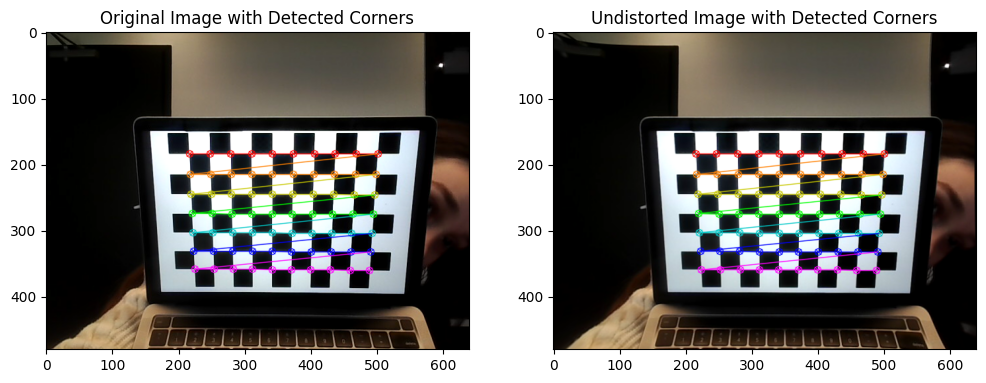

In [ ]:
# Draw detected corners on the original image
gray_example_img = cv2.cvtColor(example_img, cv2.COLOR_BGR2GRAY)
ret, corners_before = cv2.findChessboardCorners(gray_example_img, (nx, ny), None)
cv2.drawChessboardCorners(example_img, (nx, ny), corners_before, ret)

# Draw detected corners on the undistorted image
gray_undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2GRAY)
ret, corners_after = cv2.findChessboardCorners(gray_undistorted_img, (nx, ny), None)
cv2.drawChessboardCorners(undistorted_img, (nx, ny), corners_after, ret)

# Display original and undistorted images with detected corners
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Corners')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))
plt.title('Undistorted Image with Detected Corners')

plt.show()

# **Task 2.**


Pipeline for Creating a Stereo Vision System:

1. Calibration:

a. Identify matching features between the two images in each dataset using any feature matching algorithms.

b. Estimate the Fundamental matrix using RANSAC method based on the matched features.

c. Compute the Essential matrix from the Fundamental matrix considering calibration parameters.

d. Decompose the Essential matrix into rotation and translation matrices.

---

2. Rectification:

a. Apply perspective transformation to rectify images and ensure horizontal epipolar lines.

b. Print the homography matrices (H1 and H2) for rectification.

c. Visualize epipolar lines and feature points on both rectified images.

---


3. Compute Depth Image:


a. Calculate the disparity map representing the pixel-wise differences between the two images.

b. Rescale the disparity map and save it as grayscale and color images using heat map conversion.

c. Utilize the disparity information to compute depth values for each pixel.

d. Generate a depth image representing the spatial dimensions of the scene.

e. Save the depth image as grayscale and color using heat map conversion for visualization.


The Fundamental Matrix:
 [[-1.80764350e-08  3.25099999e-05 -1.68217974e-02]
 [-2.96711473e-05  3.79636237e-06  4.93513217e-01]
 [ 1.55711270e-02 -4.95595630e-01  1.00000000e+00]]

The Essential Matrix:
 [[-5.51214518e-02  9.91345027e+01  9.46199628e-01]
 [-9.04778358e+01  1.15764533e+01  8.64562351e+02]
 [-4.83356606e-01 -8.61043364e+02  9.74712063e-01]]

The approximated Rotation Matrix:
 [[ 9.99946542e-01 -5.16140327e-05 -1.03397129e-02]
 [-2.31558304e-05  9.99973855e-01 -7.23107850e-03]
 [ 1.03398158e-02  7.23093137e-03  9.99920398e-01]]

The approximated Translation Matrix:
 [[-0.99343849]
 [ 0.00121618]
 [-0.1143612 ]]


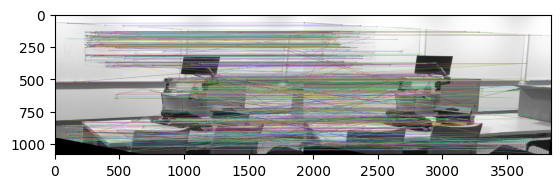

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img0 = cv2.imread('classroom/im0.png')
img1 = cv2.imread('classroom/im1.png')

# Convert images to grayscale
g_img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
g_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Step 1: Initialize SIFT detector
sift = cv2.SIFT_create()

# Step 2: Detect keypoints and compute descriptors
keypoints0, descriptors0 = sift.detectAndCompute(g_img0, None)
keypoints1, descriptors1 = sift.detectAndCompute(g_img1, None)

# Step 3: Create a BFMatcher (Brute Force Matcher)
bf = cv2.BFMatcher()

# Step 4: Match descriptors
matches = bf.knnMatch(descriptors0, descriptors1, k=2)  # Use k=2 for knn match

# Apply ratio test to select good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.9 * n.distance:
        good_matches.append(m)

# Extract coordinates of matched keypoints
points0 = np.float32([keypoints0[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
points1 = np.float32([keypoints1[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Estimate Fundamental matrix using RANSAC
fundamental_matrix, mask = cv2.findFundamentalMat(points0, points1, cv2.FM_RANSAC)
print("\nThe Fundamental Matrix:\n",fundamental_matrix )
# Apply mask to filter out outliers
points0_filtered = points0[mask.ravel() == 1]
points1_filtered = points1[mask.ravel() == 1]

# Calibration matrices (intrinsic parameters)
cam_0 = np.array([[1746.24, 0, 14.88], [0, 1746.24, 534.11], [0, 0, 1]])
cam_1 = np.array([[1746.24, 0, 14.88], [0, 1746.24, 534.11], [0, 0, 1]])

# Compute the Essential matrix from the Fundamental matrix considering calibration parameters
E = np.dot(np.dot(cam_1.T, fundamental_matrix), cam_0)
print("\nThe Essential Matrix:\n", E)
# Decompose Essential matrix into rotation and translation matrices
_, R, T, _ = cv2.recoverPose(E, points0_filtered, points1_filtered, cameraMatrix=cam_0)

# Output the estimated Rotation and Translation matrices
print("\nThe approximated Rotation Matrix:\n", R)
print("\nThe approximated Translation Matrix:\n", T)

# Display the matched keypoints using Matplotlib
match_img = cv2.drawMatches(g_img0, keypoints0, g_img1, keypoints1, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(match_img)
plt.show()


Homography matrix H1:
 [[ 4.57439839e-01 -6.89381887e-02  1.28891759e+01]
 [-1.66130424e-02  4.96044876e-01  1.61635244e+01]
 [-3.16918612e-05  4.11461691e-06  5.27091827e-01]]
Homography matrix H2:
 [[ 9.32508123e-01 -1.60357268e-03  6.56581310e+01]
 [-3.62437176e-02  1.00006380e+00  3.47595145e+01]
 [-7.03024982e-05  1.20894566e-07  1.06742512e+00]]


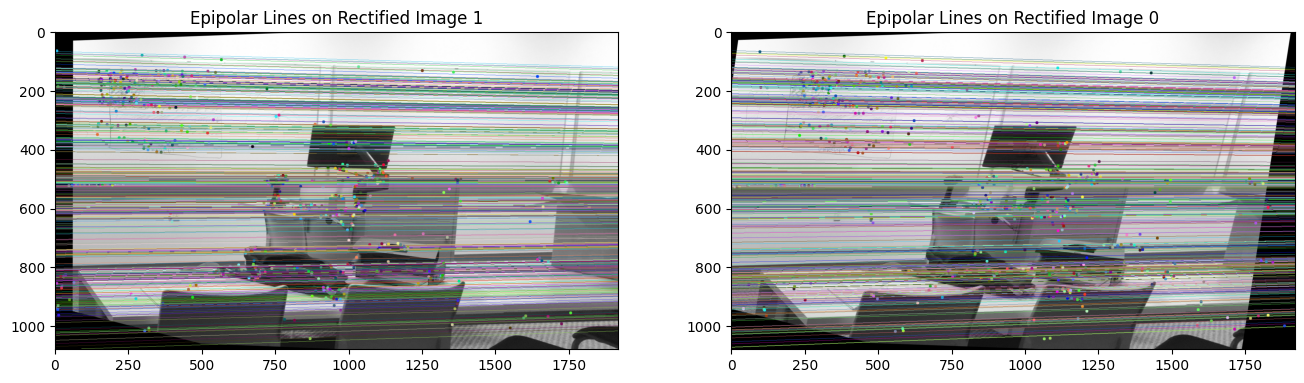

In [38]:
# Rectification:
# a. Apply perspective transformation to rectify images and ensure horizontal epipolar lines.
# b. Print the homography matrices (H1 and H2) for rectification.
# c. Visualize epipolar lines and feature points on both rectified images.

# w = 1920
# h = 1080
h , w = img0.shape[:2]
# Compute rectification transforms
_, H1, H2 = cv2.stereoRectifyUncalibrated(points0, points1, fundamental_matrix, (w,h))

# Rectify images
rectified_img0 = cv2.warpPerspective(g_img0, H1, (g_img0.shape[1], g_img0.shape[0]))
rectified_img1 = cv2.warpPerspective(g_img1, H2, (g_img1.shape[1], g_img1.shape[0]))

print("Homography matrix H1:\n", H1)
print("Homography matrix H2:\n", H2)

# Display rectified images
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.title('Rectified Image 0')
# plt.imshow(rectified_img0, cmap='gray')
# plt.subplot(122)
# plt.title('Rectified Image 1')
# plt.imshow(rectified_img1, cmap='gray')
# plt.show()

# Compute epipolar lines
lines1 = cv2.computeCorrespondEpilines(points1_filtered.reshape(-1, 2), 2, fundamental_matrix)
lines1 = lines1.reshape(-1, 3)
lines0 = cv2.computeCorrespondEpilines(points0_filtered.reshape(-1, 2), 1, fundamental_matrix)
lines0 = lines0.reshape(-1, 3)

# Draw epipolar lines on rectified images
def draw_epipolar_lines(img, lines, points):
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for r, pt in zip(lines, points):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [img.shape[1], -(r[2]+r[0]*img.shape[1])/r[1]])

        # Convert pt to tuple of integers
        pt = tuple(map(int, pt.ravel()))

        # Draw epipolar line
        img = cv2.line(img, (x0, y0), (x1, y1), color, 1)

        # Draw feature point
        img = cv2.circle(img, pt, 5, color, -1)

    return img


# Draw epipolar lines on rectified images
img1_lines = draw_epipolar_lines(rectified_img1, lines1, points1_filtered)
img0_lines = draw_epipolar_lines(rectified_img0, lines0, points0_filtered)

# Display images with epipolar lines and feature points
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title('Epipolar Lines on Rectified Image 1')
plt.imshow(img1_lines)
plt.subplot(122)
plt.title('Epipolar Lines on Rectified Image 0')
plt.imshow(img0_lines)
plt.show()

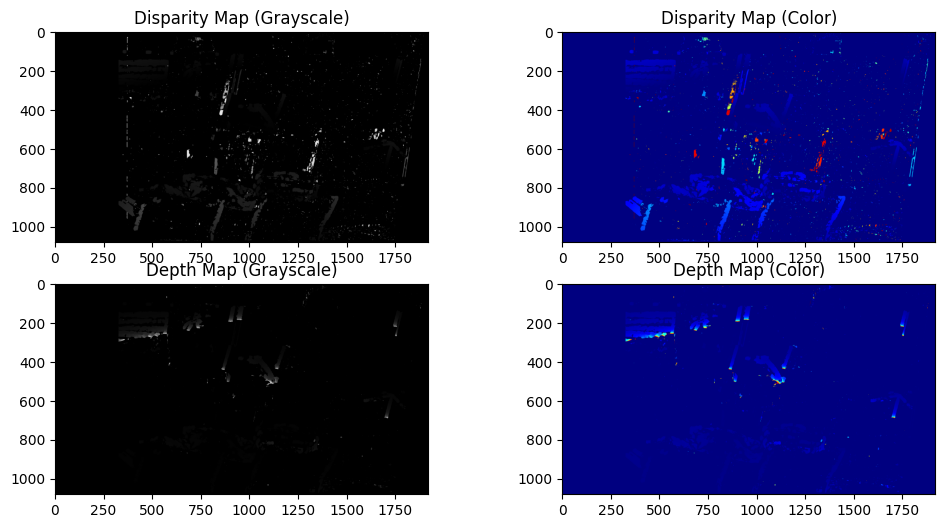

In [39]:
baseline = 678.37

# Initialize stereo matcher
stereo = cv2.StereoBM_create(numDisparities=320, blockSize=15)

# Compute disparity map
disparity = stereo.compute(rectified_img0, rectified_img1)

# Normalize disparity values for display
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Save grayscale disparity image
cv2.imwrite('disparity_gray.png', disparity_normalized)

# Convert disparity to a color image for heatmap visualization
disparity_color = cv2.applyColorMap(disparity_normalized, cv2.COLORMAP_JET)
cv2.imwrite('disparity_color.png', disparity_color)

# Calculate depth from disparity and calibration matrices
depth = np.zeros_like(disparity, dtype=np.float32)
depth[disparity > 0] = (cam_0[0, 0] * baseline) / disparity[disparity > 0]

# Normalize depth values for visualization
depth_normalized = cv2.normalize(depth, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Save depth image as grayscale and color
cv2.imwrite('depth_gray.png', depth_normalized)

# Convert depth to a color image for heatmap visualization
depth_color = cv2.applyColorMap(depth_normalized, cv2.COLORMAP_JET)
cv2.imwrite('depth_color.png', depth_color)

# Display disparity and depth images
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.title('Disparity Map (Grayscale)')
plt.imshow(disparity_normalized, cmap='gray')
plt.subplot(222)
plt.title('Disparity Map (Color)')
plt.imshow(cv2.cvtColor(disparity_color, cv2.COLOR_BGR2RGB))
plt.subplot(223)
plt.title('Depth Map (Grayscale)')
plt.imshow(depth_normalized, cmap='gray')
plt.subplot(224)
plt.title('Depth Map (Color)')
plt.imshow(cv2.cvtColor(depth_color, cv2.COLOR_BGR2RGB))
plt.show()

# **Task 2 - Storageroom.**


The Fundamental Matrix:
 [[-2.44655717e-08  2.39446082e-05 -1.94015999e-02]
 [-1.99951086e-05  3.62326921e-07 -7.35048068e-01]
 [ 1.54290282e-02  7.32444109e-01  1.00000000e+00]]

The Essential Matrix:
 [[-7.42517197e-02  7.26706228e+01 -1.12574998e+01]
 [-6.06841000e+01  1.09964309e+00 -1.30823059e+03]
 [ 7.99207459e+00  1.30991554e+03 -1.79604304e+00]]

The approximated Rotation Matrix:
 [[ 9.99956212e-01  2.37390209e-03  9.05198304e-03]
 [-2.37172931e-03  9.99997156e-01 -2.50760197e-04]
 [-9.05255257e-03  2.29280363e-04  9.99958999e-01]]

The approximated Translation Matrix:
 [[-0.99842887]
 [ 0.00851558]
 [ 0.05538302]]


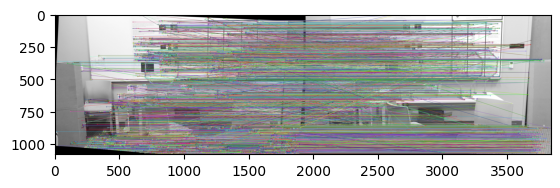

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img0 = cv2.imread('storageroom/im0.png')
img1 = cv2.imread('storageroom/im1.png')

# Convert images to grayscale
g_img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
g_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Step 1: Initialize SIFT detector
sift = cv2.SIFT_create()

# Step 2: Detect keypoints and compute descriptors
keypoints0, descriptors0 = sift.detectAndCompute(g_img0, None)
keypoints1, descriptors1 = sift.detectAndCompute(g_img1, None)

# Step 3: Create FLANN matcher
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 25)
search_params = dict(checks=85) # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Step 4: Match descriptors using FLANN
matches = flann.knnMatch(descriptors0, descriptors1, k=2)  # Use k=2 for knn match

# Apply ratio test to select good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.9 * n.distance:
        good_matches.append(m)

# Extract coordinates of matched keypoints
points0 = np.float32([keypoints0[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
points1 = np.float32([keypoints1[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Estimate Fundamental matrix using RANSAC
fundamental_matrix, mask = cv2.findFundamentalMat(points0, points1, cv2.FM_RANSAC)
print("\nThe Fundamental Matrix:\n",fundamental_matrix )
# Apply mask to filter out outliers
points0_filtered = points0[mask.ravel() == 1]
points1_filtered = points1[mask.ravel() == 1]

# Calibration matrices (intrinsic parameters)
cam_0 = np.array([[1742.11, 0, 804.90], [0, 1742.11, 541.22], [0, 0, 1]])
cam_1 = np.array([[1742.11, 0, 804.90], [0, 1742.11, 541.22], [0, 0, 1]])

# Compute the Essential matrix from the Fundamental matrix considering calibration parameters
E = np.dot(np.dot(cam_1.T, fundamental_matrix), cam_0)
print("\nThe Essential Matrix:\n",E )
# Decompose Essential matrix into rotation and translation matrices
_, R, T, _ = cv2.recoverPose(E, points0_filtered, points1_filtered, cameraMatrix=cam_0)

# Output the estimated Rotation and Translation matrices
print("\nThe approximated Rotation Matrix:\n", R)
print("\nThe approximated Translation Matrix:\n", T)

# Display the matched keypoints using Matplotlib
match_img = cv2.drawMatches(g_img0, keypoints0, g_img1, keypoints1, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(match_img)
plt.show()


Homography matrix H1:
 [[ 7.42257307e-01 -5.92885087e-03 -3.35162039e+01]
 [ 1.49413572e-02  7.32575454e-01 -1.70221324e+01]
 [ 1.93924860e-05 -5.49393640e-07  7.13047811e-01]]
Homography matrix H2:
 [[ 1.03037840e+00 -8.78471951e-03 -2.44195155e+01]
 [ 2.56337043e-02  9.99817797e-01 -2.45099668e+01]
 [ 3.16820230e-05 -2.70112112e-07  9.69731118e-01]]


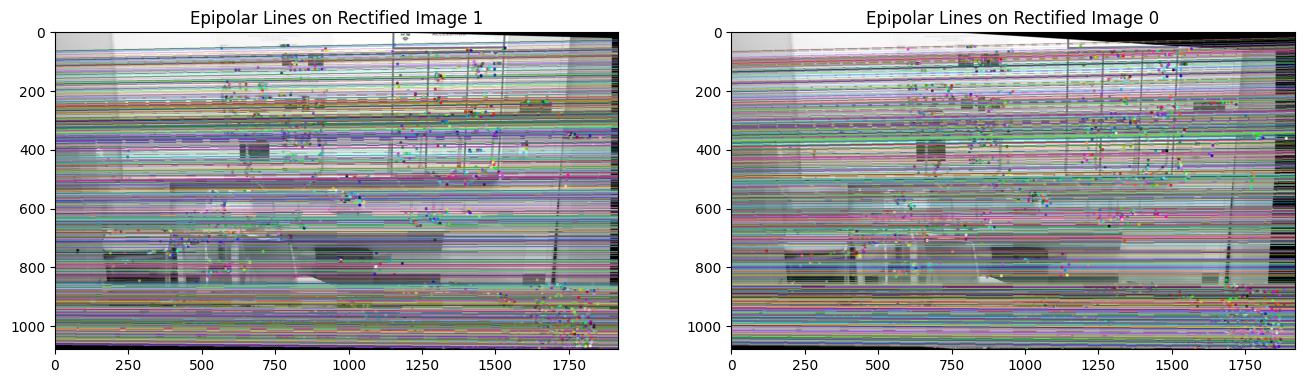

In [41]:
# Rectification:
# a. Apply perspective transformation to rectify images and ensure horizontal epipolar lines.
# b. Print the homography matrices (H1 and H2) for rectification.
# c. Visualize epipolar lines and feature points on both rectified images.

# w = 1920
# h = 1080
h , w = img0.shape[:2]
# Compute rectification transforms
_, H1, H2 = cv2.stereoRectifyUncalibrated(points0, points1, fundamental_matrix, (w,h))

# Rectify images
rectified_img0 = cv2.warpPerspective(g_img0, H1, (g_img0.shape[1], g_img0.shape[0]))
rectified_img1 = cv2.warpPerspective(g_img1, H2, (g_img1.shape[1], g_img1.shape[0]))

print("Homography matrix H1:\n", H1)
print("Homography matrix H2:\n", H2)

# Display rectified images
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.title('Rectified Image 0')
# plt.imshow(rectified_img0, cmap='gray')
# plt.subplot(122)
# plt.title('Rectified Image 1')
# plt.imshow(rectified_img1, cmap='gray')
# plt.show()

# Compute epipolar lines
lines1 = cv2.computeCorrespondEpilines(points1_filtered.reshape(-1, 2), 2, fundamental_matrix)
lines1 = lines1.reshape(-1, 3)
lines0 = cv2.computeCorrespondEpilines(points0_filtered.reshape(-1, 2), 1, fundamental_matrix)
lines0 = lines0.reshape(-1, 3)

# Draw epipolar lines on rectified images
def draw_epipolar_lines(img, lines, points):
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for r, pt in zip(lines, points):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [img.shape[1], -(r[2]+r[0]*img.shape[1])/r[1]])

        # Convert pt to tuple of integers
        pt = tuple(map(int, pt.ravel()))

        # Draw epipolar line
        img = cv2.line(img, (x0, y0), (x1, y1), color, 1)

        # Draw feature point
        img = cv2.circle(img, pt, 5, color, -1)

    return img


# Draw epipolar lines on rectified images
img1_lines = draw_epipolar_lines(rectified_img1, lines1, points1_filtered)
img0_lines = draw_epipolar_lines(rectified_img0, lines0, points0_filtered)

# Display images with epipolar lines and feature points
plt.figure(figsize=(16, 8))
plt.subplot(121)

plt.title('Epipolar Lines on Rectified Image 1')
plt.imshow(img1_lines)
plt.subplot(122)
plt.title('Epipolar Lines on Rectified Image 0')
plt.imshow(img0_lines)
plt.show()

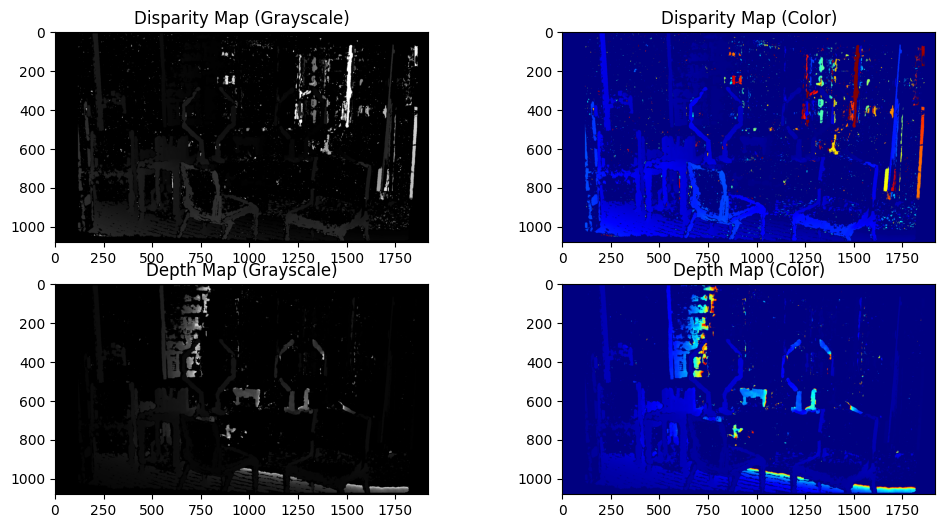

In [42]:
baseline = 221.76


# Initialize stereo matcher
num_disparities = 112
stereo = cv2.StereoBM_create(numDisparities=num_disparities, blockSize=15)

# Compute disparity map
disparity = stereo.compute(rectified_img0, rectified_img1)

# Normalize disparity values for display
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Save grayscale disparity image
cv2.imwrite('disparity_gray2.png', disparity_normalized)

# Convert disparity to a color image for heatmap visualization
disparity_color = cv2.applyColorMap(disparity_normalized, cv2.COLORMAP_JET)
cv2.imwrite('disparity_color2.png', disparity_color)

# Calculate depth from disparity and calibration matrices
depth = np.zeros_like(disparity, dtype=np.float32)
depth[disparity > 0] = (cam_0[0, 0] * baseline) / disparity[disparity > 0]

# Normalize depth values for visualization
depth_normalized = cv2.normalize(depth, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Save depth image as grayscale and color
cv2.imwrite('depth_gray2.png', depth_normalized)

# Convert depth to a color image for heatmap visualization
depth_color = cv2.applyColorMap(depth_normalized, cv2.COLORMAP_JET)
cv2.imwrite('depth_color2.png', depth_color)

# Display disparity and depth images
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.title('Disparity Map (Grayscale)')
plt.imshow(disparity_normalized, cmap='gray')
plt.subplot(222)
plt.title('Disparity Map (Color)')
plt.imshow(cv2.cvtColor(disparity_color, cv2.COLOR_BGR2RGB))
plt.subplot(223)
plt.title('Depth Map (Grayscale)')
plt.imshow(depth_normalized, cmap='gray')
plt.subplot(224)
plt.title('Depth Map (Color)')
plt.imshow(cv2.cvtColor(depth_color, cv2.COLOR_BGR2RGB))
plt.show()

# **Task 2 - Traproom.**


The approximated Rotation Matrix:
 [[ 0.99998135 -0.00148959 -0.00592331]
 [ 0.00144931  0.99997584 -0.0067984 ]
 [ 0.0059333   0.00678969  0.99995935]]

The approximated Translation Matrix:
 [[-0.99829877]
 [-0.01450504]
 [-0.05647272]]


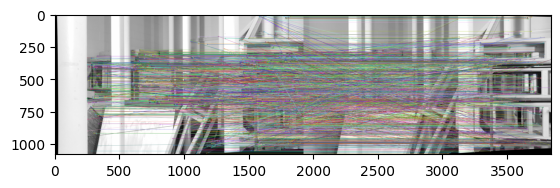

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img0 = cv2.imread('traproom/im0.png')
img1 = cv2.imread('traproom/im1.png')

# Convert images to grayscale
g_img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
g_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Step 1: Initialize SIFT detector
sift = cv2.SIFT_create()

# Step 2: Detect keypoints and compute descriptors
keypoints0, descriptors0 = sift.detectAndCompute(g_img0, None)
keypoints1, descriptors1 = sift.detectAndCompute(g_img1, None)

# Step 3: Create FLANN matcher
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 25)
search_params = dict(checks=85) # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Step 4: Match descriptors using FLANN
matches = flann.knnMatch(descriptors0, descriptors1, k=2)  # Use k=2 for knn match

# Apply ratio test to select good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.9 * n.distance:
        good_matches.append(m)

# Extract coordinates of matched keypoints
points0 = np.float32([keypoints0[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
points1 = np.float32([keypoints1[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Estimate Fundamental matrix using RANSAC
fundamental_matrix, mask = cv2.findFundamentalMat(points0, points1, cv2.FM_RANSAC)

# Apply mask to filter out outliers
points0_filtered = points0[mask.ravel() == 1]
points1_filtered = points1[mask.ravel() == 1]

# Calibration matrices (intrinsic parameters)
cam_0 = np.array([[1769.02, 0, 1271.89], [0, 1769.02, 527.17], [0, 0, 1]])
cam_1 = np.array([[1769.02, 0, 1271.89], [0, 1769.02, 527.17], [0, 0, 1]])

# Compute the Essential matrix from the Fundamental matrix considering calibration parameters
E = np.dot(np.dot(cam_1.T, fundamental_matrix), cam_0)

# Decompose Essential matrix into rotation and translation matrices
_, R, T, _ = cv2.recoverPose(E, points0_filtered, points1_filtered, cameraMatrix=cam_0)

# Output the estimated Rotation and Translation matrices
print("\nThe approximated Rotation Matrix:\n", R)
print("\nThe approximated Translation Matrix:\n", T)

# Display the matched keypoints using Matplotlib
match_img = cv2.drawMatches(g_img0, keypoints0, g_img1, keypoints1, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(match_img)
plt.show()


Homography matrix H1:
 [[ 1.03646501e+00  3.71247416e-03  3.18761257e+00]
 [-3.14961550e-02  1.11397322e+00  3.21462671e+01]
 [-3.16173926e-05  8.91863390e-06  1.13827997e+00]]
Homography matrix H2:
 [[ 9.69512915e-01  1.35538422e-02  2.19485271e+01]
 [-3.10727128e-02  9.99663318e-01  3.00116126e+01]
 [-3.16556028e-05 -4.42547012e-07  1.03062835e+00]]


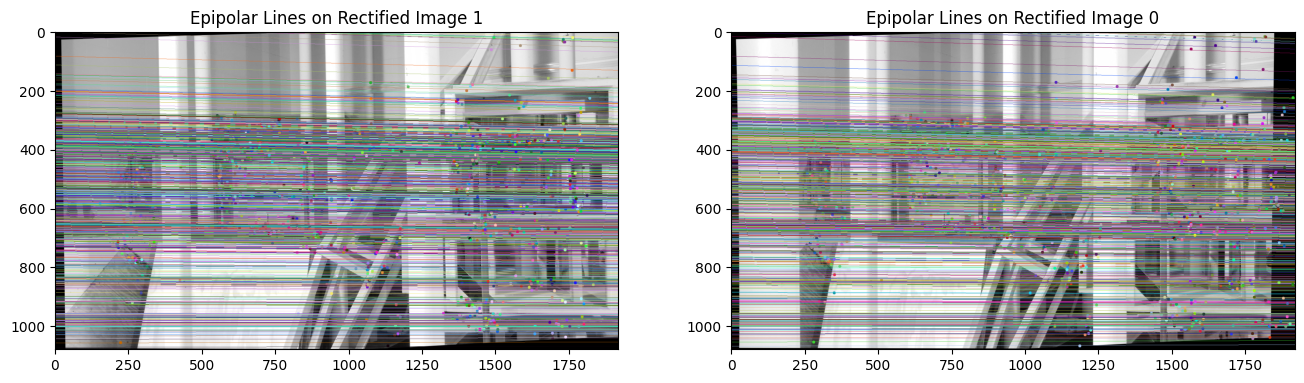

In [47]:
# Rectification:
# a. Apply perspective transformation to rectify images and ensure horizontal epipolar lines.
# b. Print the homography matrices (H1 and H2) for rectification.
# c. Visualize epipolar lines and feature points on both rectified images.

# w = 1920
# h = 1080
h , w = img0.shape[:2]
# Compute rectification transforms
_, H1, H2 = cv2.stereoRectifyUncalibrated(points0, points1, fundamental_matrix, (w,h))

# Rectify images
rectified_img0 = cv2.warpPerspective(g_img0, H1, (g_img0.shape[1], g_img0.shape[0]))
rectified_img1 = cv2.warpPerspective(g_img1, H2, (g_img1.shape[1], g_img1.shape[0]))

print("Homography matrix H1:\n", H1)
print("Homography matrix H2:\n", H2)

# Display rectified images
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.title('Rectified Image 0')
# plt.imshow(rectified_img0, cmap='gray')
# plt.subplot(122)
# plt.title('Rectified Image 1')
# plt.imshow(rectified_img1, cmap='gray')
# plt.show()

# Compute epipolar lines
lines1 = cv2.computeCorrespondEpilines(points1_filtered.reshape(-1, 2), 2, fundamental_matrix)
lines1 = lines1.reshape(-1, 3)
lines0 = cv2.computeCorrespondEpilines(points0_filtered.reshape(-1, 2), 1, fundamental_matrix)
lines0 = lines0.reshape(-1, 3)

# Draw epipolar lines on rectified images
def draw_epipolar_lines(img, lines, points):
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for r, pt in zip(lines, points):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [img.shape[1], -(r[2]+r[0]*img.shape[1])/r[1]])

        # Convert pt to tuple of integers
        pt = tuple(map(int, pt.ravel()))

        # Draw epipolar line
        img = cv2.line(img, (x0, y0), (x1, y1), color, 1)

        # Draw feature point
        img = cv2.circle(img, pt, 5, color, -1)

    return img


# Draw epipolar lines on rectified images
img1_lines = draw_epipolar_lines(rectified_img1, lines1, points1_filtered)
img0_lines = draw_epipolar_lines(rectified_img0, lines0, points0_filtered)

# Display images with epipolar lines and feature points
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title('Epipolar Lines on Rectified Image 1')
plt.imshow(img1_lines)
plt.subplot(122)
plt.title('Epipolar Lines on Rectified Image 0')
plt.imshow(img0_lines)
plt.show()

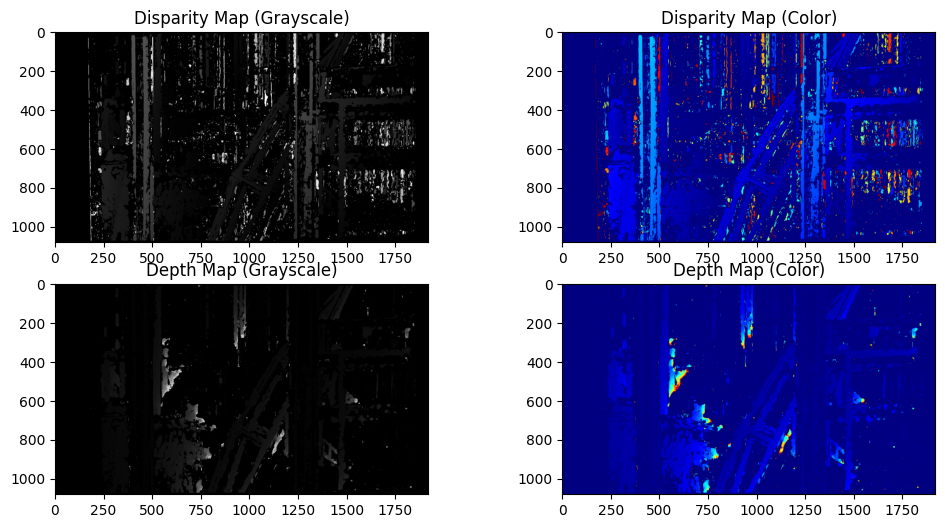

In [53]:
baseline = 295.44

stereo = cv2.StereoBM_create(160, blockSize=15)

# Compute disparity map
disparity = stereo.compute(rectified_img0, rectified_img1)

# Normalize disparity values for display
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Save grayscale disparity image
cv2.imwrite('disparity_gray3.png', disparity_normalized)

# Convert disparity to a color image for heatmap visualization
disparity_color = cv2.applyColorMap(disparity_normalized, cv2.COLORMAP_JET)
cv2.imwrite('disparity_color3.png', disparity_color)

# Calculate depth from disparity and calibration matrices
depth = np.zeros_like(disparity, dtype=np.float32)
depth[disparity > 0] = (cam_0[0, 0] * baseline) / disparity[disparity > 0]

# Normalize depth values for visualization
depth_normalized = cv2.normalize(depth, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Save depth image as grayscale and color
cv2.imwrite('depth_gray3.png', depth_normalized)

# Convert depth to a color image for heatmap visualization
depth_color = cv2.applyColorMap(depth_normalized, cv2.COLORMAP_JET)
cv2.imwrite('depth_color3.png', depth_color)

# Display disparity and depth images
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.title('Disparity Map (Grayscale)')
plt.imshow(disparity_normalized, cmap='gray')
plt.subplot(222)
plt.title('Disparity Map (Color)')
plt.imshow(cv2.cvtColor(disparity_color, cv2.COLOR_BGR2RGB))
plt.subplot(223)
plt.title('Depth Map (Grayscale)')
plt.imshow(depth_normalized, cmap='gray')
plt.subplot(224)
plt.title('Depth Map (Color)')
plt.imshow(cv2.cvtColor(depth_color, cv2.COLOR_BGR2RGB))
plt.show()